# Making laser source circularly polarized

Author: Luis Miguel Sanchez Brea

Date:   30/01/2018

Purpose: Ecograb project, polariscope callibration

We have diode laser at 850 nm (current = 350 mA)
We have lens for collimating and Thorlabs DG10-600-B diffuser
We have included a lambda/4 plate WPQ10E-850-SP. It can be rotated manually.

We have only polarizer 1 Thorlabs LPNIRE100-B in motor 4

We rotate polarizer in order to see fluctuations in intensity. We rotate lambda/4 in order to make fluctuations dissapear. 

In this case light will be circularly polarized.

**Results**:

* Is light circularly polarized?

* Which degree?

* Which is the angle for circular polarization?

In [54]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import hickle as hkl
import time
import pprint
from __future__ import print_function

### Motors definition

In [10]:
from polarimeter.motors.rotary_motors import Motors
Comports = [4, 3,   5, 7] 
Vels = [600, 600, 600, 600]

In [4]:
motors = Motors(RS232_COMPORT=Comports) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 3
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 4
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 5
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 7


### Labjack definition

In [5]:
import u3
import LabJackPython


V=1.
mV=V/1000


def to_bits(variable_integer, num_bits=16, verbose=True):
    """
    takes an integer an generates a list with bits

    Args:
        variable_integer (int): integer with data
        num_bits (int): num of output bits: 8,16, 32, 64
    """
    if num_bits == 8:
        output = map(int, [x for x in '{:08b}'.format(variable_integer)])
    elif num_bits == 16:
        output = map(int, [x for x in '{:016b}'.format(variable_integer)])
    elif num_bits == 32:
        output = map(int, [x for x in '{:032b}'.format(variable_integer)])
    elif num_bits == 64:
        output = map(int, [x for x in '{:064b}'.format(variable_integer)])

    if verbose is True:
        print( output)
    return output

In [6]:
# loads labjack
d=u3.U3()

In [7]:
print("\n Callibration data:")
data_callibration=d.getCalibrationData()
pprint.pprint(data_callibration)


 Callibration data:
{'dac0Offset': -0.6872114308644086,
 'dac0Slope': 50.9896679460071,
 'dac1Offset': -0.701979405945167,
 'dac1Slope': 50.91950369440019,
 'hvAIN0Offset': -10.518997645704076,
 'hvAIN0Slope': 0.00031980290077626705,
 'hvAIN1Offset': -10.489001986570656,
 'hvAIN1Slope': 0.0003192389849573374,
 'hvAIN2Offset': -10.523998295888305,
 'hvAIN2Slope': 0.0003195337485522032,
 'hvAIN3Offset': -10.51609767600894,
 'hvAIN3Slope': 0.00031975959427654743,
 'lvDiffOffset': -2.490987469209358,
 'lvDiffSlope': 7.56862573325634e-05,
 'lvSEOffset': 0.001728925621137023,
 'lvSESlope': 3.775535151362419e-05,
 'tempSlope': 0.01259785215370357,
 'vRef1.5AtCal': 0.0,
 'vRefAtCAl': 2.486867640633136,
 'vRegAtCal': 0.0}


In [8]:
AIN_number=1
ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
print(ainValue)


2.85643887636


In [9]:
def get_intensity(AIN_number=1, verbose=True):
    ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
    ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
    if verbose is True:
        print("{:2.2f}".format(ainValue), end=', ')
    return ainValue

### checking movements

In [28]:
Vels = [20, 20, 20, 20]
motors.get_position(verbose=True);
motors.move([0,0,0,0], velocities=Vels, verbose=False)

current positions = ([ 0.], [ 0.], [ 0.], [ 0.])


### Experiment
Place polarizer at a certain angle and check that intensity does not vary when moving the linear polarizer at motor 4

In [47]:
Vels = [100, 100, 100, 100]

positions=sp.linspace(0,360,36)
intensities=sp.zeros_like(positions,dtype=float)

In [48]:
for i, position in enumerate(positions):
    motors.move(
        positions=[0, 0, 0, position], velocities=Vels, verbose=False)
    intensities[i]=get_intensity(verbose=True)


7.79, 7.80, 7.80, 7.80, 7.78, 7.79, 7.80, 7.80, 7.80, 7.78, 7.77, 7.77, 7.80, 7.76, 7.77, 7.81, 7.80, 7.76, 7.77, 7.78, 7.79, 7.79, 7.79, 7.78, 7.78, 7.78, 7.78, 7.78, 7.79, 7.76, 7.76, 7.76, 7.76, 7.78, 7.78, 7.77, 

<IPython.core.display.Javascript object>


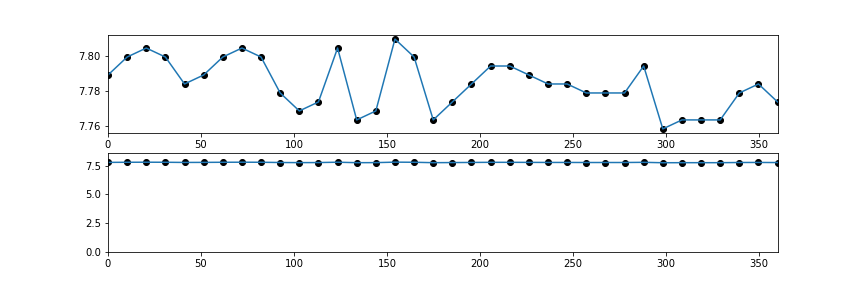

(0, 8.5905008239438772)

In [58]:
plt.figure(figsize=(12,4))
plt.subplot(211)
plt.plot(positions,intensities,'ko')
plt.plot(positions, intensities)
plt.xlim(positions[0], positions[-1])
plt.subplot(212)
plt.plot(positions,intensities,'ko')
plt.plot(positions, intensities)
plt.xlim(positions[0], positions[-1])
plt.ylim(ymin=0, ymax=intensities.max()*1.1)


## Final: Close

In [59]:
motors.close()
del motors
LabJackPython.Close()

## Conclusions 

* Angle is independent on intensity. There should be a value of axis (study in theory)

* Light is circularly polarized